<a href="https://colab.research.google.com/github/SHIVAA17/Sparks_Foundation/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Author: Shivkumar Hudge</h1>**




The Sparks Foundation: Data Science And Business Analytics Internship

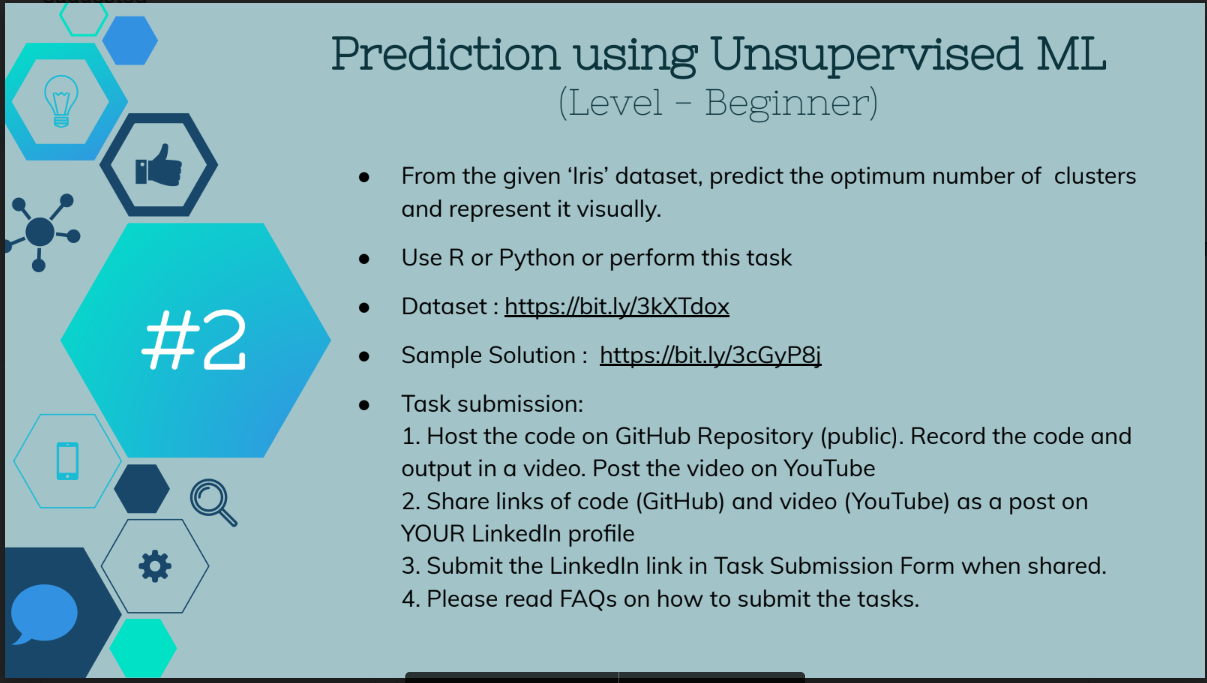

TASK 2: Prediction using Unsupervised ML
Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.



In [ ]:
#importing the libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Reading the dataset
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking the null values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#to find no of rows and columns
dataset.shape

(150, 6)

In [ ]:
#Types of Species available
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#to know the data type 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#to select the columns that is needed
X = dataset.iloc[:,[0,1,2,3]]
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0      1            5.1           3.5            1.4
1      2            4.9           3.0            1.4
2      3            4.7           3.2            1.3
3      4            4.6           3.1            1.5
4      5            5.0           3.6            1.4
..   ...            ...           ...            ...
145  146            6.7           3.0            5.2
146  147            6.3           2.5            5.0
147  148            6.5           3.0            5.2
148  149            6.2           3.4            5.4
149  150            5.9           3.0            5.1

[150 rows x 4 columns]


In [ ]:
#Apply the Kmeans Algorithm for clustering 
#to find no of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)



In [ ]:
print(wcss)


[281831.5446666667, 70581.38080000003, 31320.71120000001, 17758.792503556186, 11468.96874702381, 7921.8634730769245, 5911.632365518541, 4541.979023391813, 3571.9110955882347, 2943.933100840336]


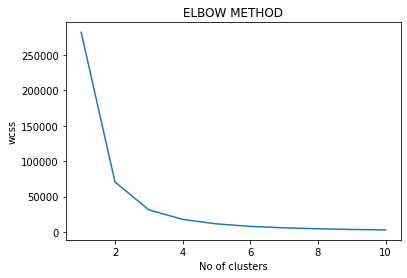

In [ ]:
#visualizing the elbow function
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Training the model 

kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
X=np.array(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


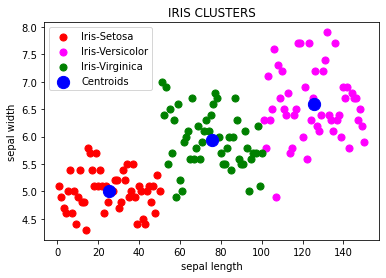

In [ ]:
#Clustering based on sepal width and sepal length
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Iris-Setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='magenta',label='Iris-Versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='blue',label='Centroids')
plt.title('IRIS CLUSTERS')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()
     

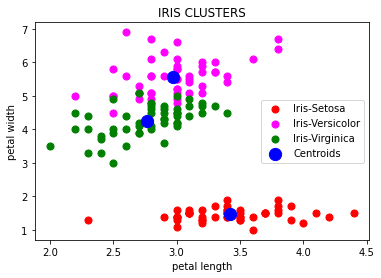

In [ ]:
#Clustering based on petal width and petal length

plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],s=50,c='red',label='Iris-Setosa')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],s=50,c='magenta',label='Iris-Versicolor')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],s=50,c='green',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=150,c='blue',label='Centroids')
plt.title('IRIS CLUSTERS')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

     